### sklearn.cluster.KMeans
> class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

print(irisDF.shape)
irisDF.head(3)

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)

kmeans.fit(irisDF)

In [ ]:
print(kmeans.labels_)

irisDF['cluster']=kmeans.labels_

In [ ]:
iris.target

In [ ]:
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

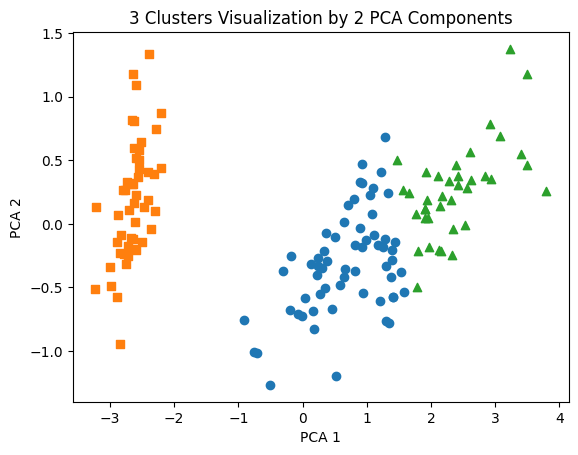

In [18]:
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

In [ ]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

print(clusterDF.shape)
clusterDF.head(3)

In [ ]:
target_list = np.unique(y)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
	target_cluster = clusterDF[clusterDF['target'] == target]
	plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

In [16]:
clusterDF

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,2
...,...,...,...,...
195,2.956576,0.033718,1,0
196,-2.074113,4.245523,2,1
197,2.783411,1.151438,1,0
198,1.226724,3.620511,0,2


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels : 
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])

    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color = 'white', alpha=0.9, edgecolors='k', marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color = 'k', edgecolors='k', marker = '$%d$' % label)

plt.show()

In [17]:
label_cluster

,ftr1,ftr2,target,kmeans_label
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2
4,1.214861,5.364896,0,2
8,1.077800,4.625379,0,2
10,0.653729,5.281743,0,2
...,...,...,...,...
180,1.142890,5.085099,0,2
185,2.792074,3.140295,0,2
188,1.091505,5.467206,0,2
189,2.514624,5.488199,0,2
